In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
from sklearn.model_selection import GridSearchCV

# Base

In [4]:
# Importando a base
train = pd.read_csv('train_treated.csv')

## Dividindo entre treino e teste

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.25, random_state=0)

# Criando dicionario de scores

In [6]:
metrics_dict = {'label': [], 'accuracy': [], 'recall': [], 'precision': [], 'F1': []}

# LogisticRegression

In [7]:
# Importando
from sklearn.linear_model import LogisticRegression
# Instanciando
logisticR = LogisticRegression(max_iter=700)

In [8]:
logisticR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 700,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [9]:
# Treinando e prevendo
logisticR.fit(x_train, y_train)
logisticR_predict = logisticR.predict(x_test)

In [10]:
metrics.confusion_matrix(logisticR_predict, y_test)

array([[116,  23],
       [ 23,  61]], dtype=int64)

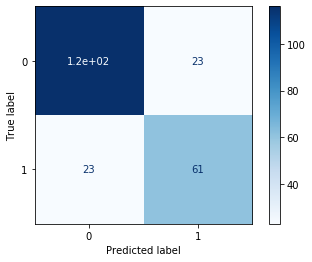

In [11]:
plot_confusion_matrix(logisticR, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [12]:
metrics_dict['label'].append('Logistic')
metrics_dict['accuracy'].append(metrics.accuracy_score(logisticR_predict, y_test))
metrics_dict['recall'].append(metrics.recall_score(logisticR_predict, y_test))
metrics_dict['precision'].append(metrics.precision_score(logisticR_predict, y_test))
metrics_dict['F1'].append(metrics.f1_score(logisticR_predict, y_test))

# Máquina de Vetor Suporte

In [13]:
# Importando
from sklearn.svm import SVC
# Instanciando
supportV = SVC()

In [14]:
supportV.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
supportV_param_grid = {'kernel': ['rbf'],#['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
                  'gamma': ['scale', 'auto'],
                  'C': [1, 10, 50, 100,200,300, 1000]}

supportV_gridsearch = GridSearchCV(supportV, param_grid = supportV_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

supportV_gridsearch.fit(x_train, y_train)

supportV_best = supportV_gridsearch.best_estimator_

# Best score
supportV_gridsearch.best_score_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    1.2s finished


0.6796319156099203

In [16]:
supportV_gridsearch.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
supportV_predict_gs = supportV_gridsearch.predict(x_test)

In [18]:
metrics_dict['label'].append('SVM gridsearch')
metrics_dict['accuracy'].append(metrics.accuracy_score(supportV_predict_gs, y_test))
metrics_dict['recall'].append(metrics.recall_score(supportV_predict_gs, y_test))
metrics_dict['precision'].append(metrics.precision_score(supportV_predict_gs, y_test))
metrics_dict['F1'].append(metrics.f1_score(supportV_predict_gs, y_test))
metrics_dict

{'label': ['Logistic', 'SVM gridsearch'],
 'accuracy': [0.7937219730941704, 0.7130044843049327],
 'recall': [0.7261904761904762, 0.8125],
 'precision': [0.7261904761904762, 0.30952380952380953],
 'F1': [0.7261904761904762, 0.4482758620689655]}

In [19]:
# Treinando e prevendo com default
supportV.fit(x_train, y_train)
supportV_predict = supportV.predict(x_test)

In [20]:
metrics_dict['label'].append('SVM default')
metrics_dict['accuracy'].append(metrics.accuracy_score(supportV_predict, y_test))
metrics_dict['recall'].append(metrics.recall_score(supportV_predict, y_test))
metrics_dict['precision'].append(metrics.precision_score(supportV_predict, y_test))
metrics_dict['F1'].append(metrics.f1_score(supportV_predict, y_test))
metrics_dict

{'label': ['Logistic', 'SVM gridsearch', 'SVM default'],
 'accuracy': [0.7937219730941704, 0.7130044843049327, 0.6547085201793722],
 'recall': [0.7261904761904762, 0.8125, 1.0],
 'precision': [0.7261904761904762, 0.30952380952380953, 0.08333333333333333],
 'F1': [0.7261904761904762, 0.4482758620689655, 0.15384615384615385]}

# Decision tree

In [21]:
# Importando
from sklearn.tree import DecisionTreeClassifier
# Instanciando
decisionT = DecisionTreeClassifier(random_state=42)

In [22]:
# Treinando e prevendo
decisionT.fit(x_train, y_train)
decisionT_predict = decisionT.predict(x_test)

In [23]:
metrics_dict['label'].append('Decision')
metrics_dict['accuracy'].append(metrics.accuracy_score(decisionT_predict, y_test))
metrics_dict['recall'].append(metrics.recall_score(decisionT_predict, y_test))
metrics_dict['precision'].append(metrics.precision_score(decisionT_predict, y_test))
metrics_dict['F1'].append(metrics.f1_score(decisionT_predict, y_test))
metrics_dict

{'label': ['Logistic', 'SVM gridsearch', 'SVM default', 'Decision'],
 'accuracy': [0.7937219730941704,
  0.7130044843049327,
  0.6547085201793722,
  0.757847533632287],
 'recall': [0.7261904761904762, 0.8125, 1.0, 0.6785714285714286],
 'precision': [0.7261904761904762,
  0.30952380952380953,
  0.08333333333333333,
  0.6785714285714286],
 'F1': [0.7261904761904762,
  0.4482758620689655,
  0.15384615384615385,
  0.6785714285714286]}

# Redes Neurais

In [24]:
# Importando
from sklearn.neural_network import MLPClassifier
# Instanciando
neuralN = MLPClassifier(random_state=42)

In [25]:
# Treinando e prevendo
neuralN.fit(x_train, y_train)
neuralN_predict = neuralN.predict(x_test)

In [26]:
metrics_dict['label'].append('Neural')
metrics_dict['accuracy'].append(metrics.accuracy_score(neuralN_predict, y_test))
metrics_dict['recall'].append(metrics.recall_score(neuralN_predict, y_test))
metrics_dict['precision'].append(metrics.precision_score(neuralN_predict, y_test))
metrics_dict['F1'].append(metrics.f1_score(neuralN_predict, y_test))
metrics_dict

{'label': ['Logistic', 'SVM gridsearch', 'SVM default', 'Decision', 'Neural'],
 'accuracy': [0.7937219730941704,
  0.7130044843049327,
  0.6547085201793722,
  0.757847533632287,
  0.7982062780269058],
 'recall': [0.7261904761904762,
  0.8125,
  1.0,
  0.6785714285714286,
  0.6893203883495146],
 'precision': [0.7261904761904762,
  0.30952380952380953,
  0.08333333333333333,
  0.6785714285714286,
  0.8452380952380952],
 'F1': [0.7261904761904762,
  0.4482758620689655,
  0.15384615384615385,
  0.6785714285714286,
  0.7593582887700535]}

# Scores

In [27]:
pd.DataFrame(metrics_dict)

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.726190,0.726190,0.726190
1,SVM gridsearch,0.713004,0.812500,0.309524,0.448276
2,SVM default,0.654709,1.000000,0.083333,0.153846
3,Decision,0.757848,0.678571,0.678571,0.678571
4,Neural,0.798206,0.689320,0.845238,0.759358
